# Labor Force Survey 2016

Taken from the Philippine Statistics Authority (PSA), the dataset is a survey conducted in 2016 with respect in Demographic, Economic Characteristics and Past Quarter Activities of the surveyed individuals in this dataset. (To be enhanced after doing the project code and stuff)



## Description

TBA

## Python libraries and modules used.

Imported the necessary libraries
- pandas, numpy, matplotlib.pyplot, and seaborn.


##  Data Preprocessing

TBA

Importing necessary libraries

In [64]:
from itertools import combinations
%load_ext autoreload
%autoreload 2

# Import libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import custom modules
import data_analysis

sns.set_theme("paper", "white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read dataset

In [ ]:
df = pd.read_csv("LFS PUF April 2016.CSV")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180862 entries, 0 to 180861
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PUFREG           180862 non-null  int64  
 1   PUFPRV           180862 non-null  int64  
 2   PUFPRRCD         180862 non-null  int64  
 3   PUFHHNUM         180862 non-null  int64  
 4   PUFURB2K10       180862 non-null  int64  
 5   PUFPWGTFIN       180862 non-null  float64
 6   PUFSVYMO         180862 non-null  int64  
 7   PUFSVYYR         180862 non-null  int64  
 8   PUFPSU           180862 non-null  int64  
 9   PUFRPL           180862 non-null  int64  
 10  PUFHHSIZE        180862 non-null  int64  
 11  PUFC01_LNO       180862 non-null  int64  
 12  PUFC03_REL       180862 non-null  int64  
 13  PUFC04_SEX       180862 non-null  int64  
 14  PUFC05_AGE       180862 non-null  int64  
 15  PUFC06_MSTAT     180862 non-null  object 
 16  PUFC07_GRADE     180862 non-null  obje

In [ ]:
# finding missing values
df.isnull().sum()

,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


Force Missing Values to NaN to correctly identify missing values because of different data types. (Int, Float, and Object)

There are missing data that are represented as different invisible characters.

In [ ]:
# df.replace(["", " ", "NA", "N/A", "-", "NULL"], np.nan, inplace=True)
df.replace("", np.nan, inplace=True)

In [ ]:
df = df.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

Sanity Checking

In [ ]:
df

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,NaN,8,NaN,NaN,NaN,2,NaN,NaN,NaN,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# see percentage of missing values
df.isnull().sum()/df.shape[0]*100

,0
PUFREG,0.000000
PUFPRV,0.000000
PUFPRRCD,0.000000
PUFHHNUM,0.000000
PUFURB2K10,0.000000
PUFPWGTFIN,0.000000
PUFSVYMO,0.000000
PUFSVYYR,0.000000
PUFPSU,0.000000
PUFRPL,0.000000


In [ ]:
#checking for duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
#identify garbage values
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

PUFC06_MSTAT
1    80708
2    71967
3     7207
4     2566
6       51
5       24
Name: count, dtype: int64
******************************
PUFC07_GRADE
350    33256
280    17989
320     9059
250     8794
240     8641
       ...  
542        4
576        4
544        1
585        1
564        1
Name: count, Length: 67, dtype: int64
******************************
PUFC08_CURSCH
1    51643
2    22082
Name: count, dtype: int64
******************************
PUFC09_GRADTECH
2    117167
1      5913
Name: count, dtype: int64
******************************
PUFC10_CONWR
5    119496
1      3333
2       210
4        29
3        12
Name: count, dtype: int64
******************************
PUFC11_WORK
2    87556
1    71412
Name: count, dtype: int64
******************************
PUFC12_JOB
2    86466
1     1090
Name: count, dtype: int64
******************************
PUFC14_PROCC
92    10226
61     8515
14     6822
52     5744
93     5390
13     3968
91     3048
83     2823
51     2793
71     2524
62   

Impute missing values

In [ ]:
# Replace numeric values with mean
df.fillna(df.select_dtypes(include=["number"]).mean(numeric_only=True), inplace=True)

# Replace categorical values with mode
for col in df.select_dtypes(include=["object"]):
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "unknown"
    df[col] = df[col].fillna(mode_value)

df

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,002,7,1,1,1,1,52,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,002,7,1,1,1,1,52,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,002,7,1,1,1,1,52,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,002,8,1,1,1,2,52,1,01,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,002,7,1,1,1,1,52,1,01,1
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,002,7,1,1,1,1,52,1,01,1


Binning and Encoding

<Axes: xlabel='PUFC25_PBASIC', ylabel='Count'>

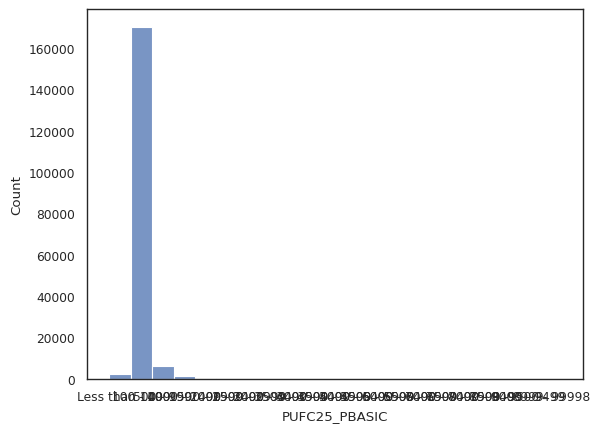

In [ ]:
bins = [0, 100, 499, 999, 1499, 1999, 2499, 2999, 3499, 3999,
        4499, 4999, 5499, 5999, 6499, 6999, 7499, 7999, 8499,
        8999, 9499, 99998]

# Define labels from the provided ranges
labels = [
    "Less than 100", "100 - 499", "500 - 999", "1000 - 1499",
    "1500 - 1999", "2000 - 2499", "2500 - 2999", "3000 - 3499",
    "3500 - 3999", "4000 - 4499", "4500 - 4999", "5000 - 5499",
    "5500 - 5999", "6000 - 6499", "6500 - 6999", "7000 - 7499",
    "7500 - 7999", "8000 - 8499", "8500 - 8999", "9000 - 9499",
    "9500 - 99998"
]

df["PUFC25_PBASIC"] = pd.cut(df["PUFC25_PBASIC"].astype(int), bins=bins, labels=labels, include_lowest=True)
sns.histplot(df["PUFC25_PBASIC"])

Check for data type representation and distribution of the data

Plotting all distributions...


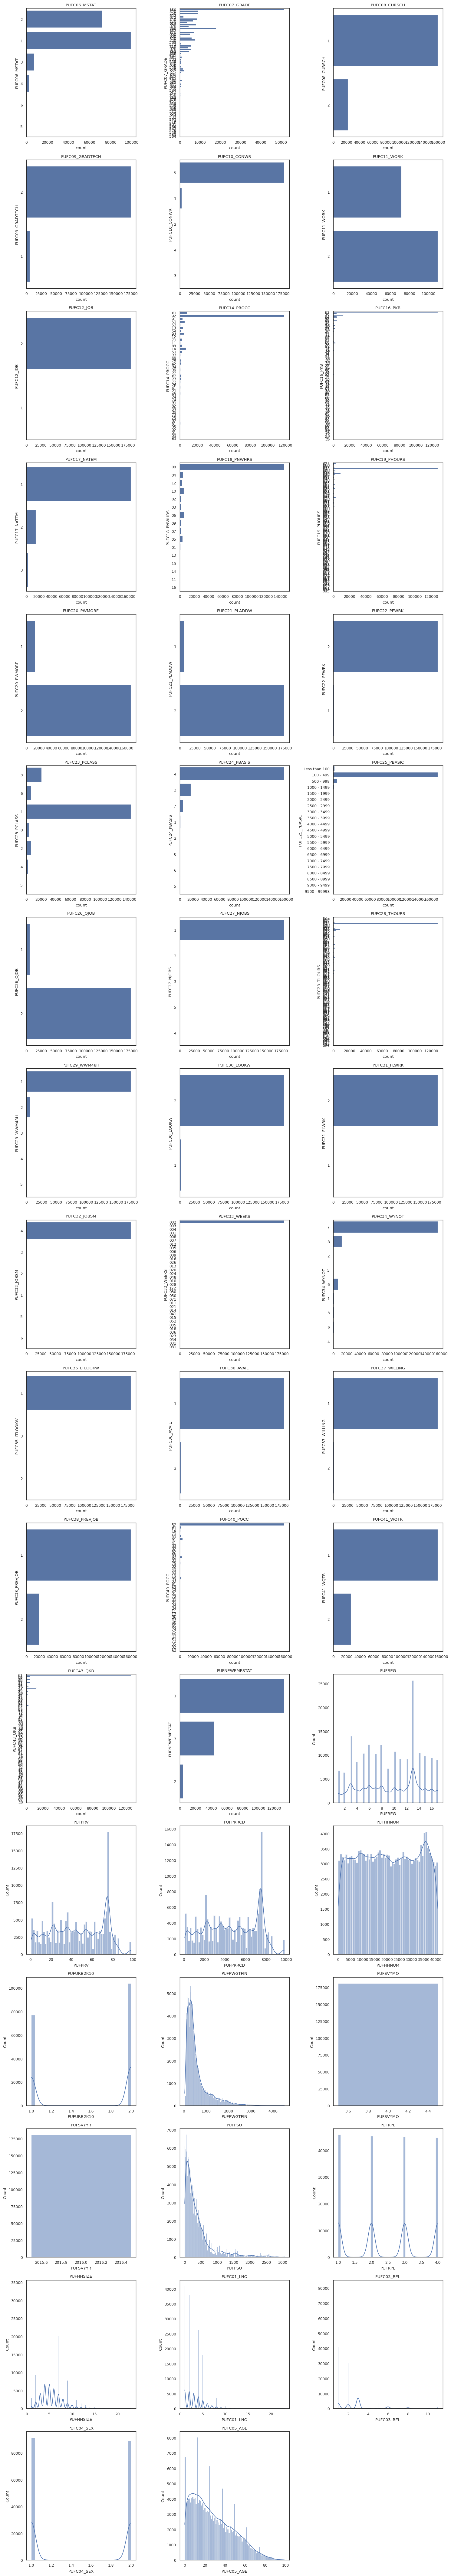

In [ ]:
from data_analysis import plot_all_distributions
plot_all_distributions(df)

Make incorrectly encoded columns as numerical to categorical

In [ ]:
columns = ["PUFURB2K10", "PUFHHSIZE", "PUFC04_SEX", "PUFREG"]
df[columns] = df[columns].astype("object")

Test for relationship between categorical variables

In [ ]:
categorical_columns = list(df.select_dtypes(include=["object"]).columns)

In [ ]:
from statistical_tests import chi_squared_test
from itertools import combinations
results = []

for col1, col2 in combinations(categorical_columns, 2):
    if col1 != col2:
        chi2, p, v = chi_squared_test(df, col1, col2)
        if p < 0.05:
            results.append([col1, col2, chi2, p, v])

if results:
    results_df = pd.DataFrame(results, columns=["Column 1", "Column 2", "Chi-Squared", "P-Value", "Cramers V"])

In [ ]:
results_df

,Column 1,Column 2,Chi-Squared,P-Value,Cramers V
0,PUFREG,PUFURB2K10,63424.142082,0.000000e+00,0.592180
1,PUFREG,PUFHHSIZE,6239.530142,0.000000e+00,0.046435
2,PUFREG,PUFC04_SEX,66.682757,3.774194e-08,0.019201
3,PUFREG,PUFC06_MSTAT,941.917271,2.750783e-147,0.032274
4,PUFREG,PUFC07_GRADE,16399.738506,0.000000e+00,0.075281
...,...,...,...,...,...
654,PUFC40_POCC,PUFC43_QKB,14944.038235,0.000000e+00,0.044354
655,PUFC40_POCC,PUFNEWEMPSTAT,80341.433247,0.000000e+00,0.471282
656,PUFC41_WQTR,PUFC43_QKB,13226.336495,0.000000e+00,0.270425
657,PUFC41_WQTR,PUFNEWEMPSTAT,70639.154101,0.000000e+00,0.624955


Remove unnecessary columns

In [ ]:
df.drop(columns=["PUFSVYYR", "PUFPRRCD", "PUFHHNUM", "PUFREG", "PUFPSU", "PUFRPL", "PUFC01_LNO", "PUFC03_REL"], inplace=True)

#### Pearson Correlation

After getting the necessary columns, we can now determine if any of the still existing columns correlate with each other.

-1:
Represents a perfect negative correlation (as one variable increases, the other decreases linearly).  

0:
Indicates no linear correlation.  

+1:
Represents a perfect positive correlation (as one variable increases, the other increases linearly).  

Values between -1 and 0:
Indicate a negative correlation, with the strength increasing as the value moves closer to -1.  

Values between 0 and +1:
Indicate a positive correlation, with the strength increasing as the value moves closer to +1.


In [43]:
# df.to_csv("cleaned_data.csv", index=False)

Make "PUFC25_PBASIC" numerical instead of a range

In [75]:
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("Less than 100", "0")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("100 - 499", "250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("500 - 999", "750")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("1000 - 1499", "1250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("1500 - 1999", "1750")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("2000 - 2499", "2250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("2500 - 2999", "2750")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("3000 - 3499", "3250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("3500 - 3999", "3750")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("4000 - 4499", "4250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("4500 - 4999", "4750")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("5000 - 5499", "5250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("5500 - 5999", "5750")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("6000 - 6499", "6250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("6500 - 6999", "6750")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("7000 - 7499", "7250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("7500 - 7999", "7750")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("8000 - 8499", "8250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("8500 - 8999", "8750")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("9000 - 9499", "9250")
df["PUFC25_PBASIC"] = df["PUFC25_PBASIC"].str.replace("9500 - 99998", "54749")

#### Correlate

In [76]:
corr_matrix = df.corr()

In [77]:
corr_matrix

,PUFPRV,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFHHSIZE,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC08_CURSCH,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
PUFPRV,1.000000,-0.174510,-0.148126,NaN,-0.023405,0.001675,0.002652,0.006116,0.015968,0.002377,...,0.001970,0.009284,0.002417,0.008667,0.006522,0.040006,-0.017610,-0.002292,0.025513,0.023552
PUFURB2K10,-0.174510,1.000000,-0.095282,NaN,0.027566,-0.009932,-0.021261,-0.019435,-0.155582,0.004100,...,-0.013643,-0.007602,-0.003331,0.000863,-0.000276,-0.017495,0.052130,-0.035797,-0.148504,-0.033722
PUFPWGTFIN,-0.148126,-0.095282,1.000000,NaN,-0.007110,0.003738,-0.013538,0.003018,0.015504,0.003950,...,0.006314,0.005708,0.001473,-0.007718,-0.006131,-0.019550,0.002311,0.017888,0.025341,0.000621
PUFSVYMO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PUFHHSIZE,-0.023405,0.027566,-0.007110,NaN,1.000000,-0.004632,-0.212280,-0.182183,-0.063477,0.060725,...,-0.000367,0.039065,0.002712,0.000487,-0.001476,0.053730,-0.011837,-0.065488,-0.086615,-0.023518
PUFC04_SEX,0.001675,-0.009932,0.003738,NaN,-0.004632,1.000000,0.035234,0.094370,0.048594,-0.017319,...,-0.006928,0.028759,-0.017885,-0.021783,-0.021205,0.077909,0.079173,0.192161,-0.010941,0.225985
PUFC05_AGE,0.002652,-0.021261,-0.013538,NaN,-0.212280,0.035234,1.000000,0.725099,0.189853,-0.162819,...,0.000974,-0.192108,0.013413,0.044293,0.048090,-0.071688,0.098695,0.332265,0.295637,0.235917
PUFC06_MSTAT,0.006116,-0.019435,0.003018,NaN,-0.182183,0.094370,0.725099,1.000000,0.126468,-0.138877,...,-0.007559,-0.139313,-0.007157,0.010749,0.014363,-0.138494,0.094372,0.275390,0.262055,0.145309
PUFC07_GRADE,0.015968,-0.155582,0.015504,NaN,-0.063477,0.048594,0.189853,0.126468,1.000000,0.011380,...,0.023948,0.055479,0.029307,0.021468,0.014471,0.173227,-0.076635,0.094816,0.285822,0.190378
PUFC08_CURSCH,0.002377,0.004100,0.003950,NaN,0.060725,-0.017319,-0.162819,-0.138877,0.011380,1.000000,...,0.035305,-0.082824,0.061916,0.057172,0.045200,0.077311,0.042049,0.027179,0.056459,0.058357


In [80]:
corr_matrix.to_csv("correlation_matrix.csv")

#### Get correlations that are -1, 0 and +1

In [ ]:
#from data_analysis import plot_all_distributions
#plot_all_distributions(df)